In [3]:
import sqlite3

In [4]:
conn = sqlite3.connect('example.db')

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv (r'C:\Users\cvolt\Documents\TU Delft\Master\Jaar 2\Blok 1\WM0824TU Economics of Cybersecurity\underground_cyber\feedbacks.csv')
print (df)

                                hash_str category  marketplace  \
0       eccd15d45510ce42400794e6f714c463  malware     Alphabay   
1       245b10f91e425118726326e25d795f05  malware     Alphabay   
2       6e6943496caeaac4cf8ed27cc7f5c99c  malware     Alphabay   
3       89b5e952f30a336bcf5a019033dba49e  malware     Alphabay   
4       b2ba7249464afb641a577f893ff8d1c3  malware     Alphabay   
...                                  ...      ...          ...   
564199  82418de6b0918fa3e1286929b490bc69    other  Silk Road 1   
564200  96309b0e92ee2ca63197cbb1441daaaf    other  Silk Road 1   
564201  f4501bd694a9f5e186624350d1bca1e8    other  Silk Road 1   
564202  fd2bff284aa276a1cc46672c9e207e6d    other  Silk Road 1   
564203  6a6c6146741edef95b40d9c2fe5192a6    other    Evolution   

                               item_hash        date  \
0       011971e1a3a982cdd1f4bfa85b299b9e  2015-04-29   
1       02135ec825483815cda83d2b50464860  2016-06-21   
2       02135ec825483815cda83d2b5046486

In [10]:
df.head()

,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd
0,eccd15d45510ce42400794e6f714c463,malware,Alphabay,011971e1a3a982cdd1f4bfa85b299b9e,2015-04-29,d8e1014c9e3c1649b8111557f928d93b,f848fa05a8b9e8f96e6dae9edd34a606,No comment,Bot Bundle - More than 150 different Bots,0.0,8.37
1,245b10f91e425118726326e25d795f05,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-06-21,23fe762da44d498b4f16f92ca77eb296,fd4ba8c2e62e15b0612409540c6afb2e,No comment,Proxifier v. 3.29,0.0,7.00
2,6e6943496caeaac4cf8ed27cc7f5c99c,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-05-12,1345dfdc59e68fce93d428444e99c9f1,fd4ba8c2e62e15b0612409540c6afb2e,Works like a charm ...,Proxifier v. 3.29,0.0,7.00
3,89b5e952f30a336bcf5a019033dba49e,malware,Alphabay,02135ec825483815cda83d2b50464860,2017-02-11,338d2467885a5168a0cb82b73e0c02a7,fd4ba8c2e62e15b0612409540c6afb2e,A++,Proxifier v. 3.29,0.0,7.00
4,b2ba7249464afb641a577f893ff8d1c3,malware,Alphabay,02135ec825483815cda83d2b50464860,2016-12-19,17f5fb0fbde6a3592b7c6e3772c53346,fd4ba8c2e62e15b0612409540c6afb2e,GG is just the best period!!!,Proxifier v. 3.29,0.0,7.00


In [11]:
df.columns

Index(['hash_str', 'category', 'marketplace', 'item_hash', 'date',
       'giver_hash', 'receiver_hash', 'message', 'order_title',
       'feedback_value', 'order_amount_usd'],
      dtype='object')

# First look at the category

In [12]:
df.groupby(by = ['category']).sum()

,feedback_value,order_amount_usd
category,,
RAT,1298.0,1.607028e+04
app,2213.0,1.281546e+04
botnet,2218.0,4.690420e+04
cash-out,279810.0,7.864318e+06
e-mail,4537.0,9.728035e+04
exploits,3137.0,1.760280e+04
hosting,311.0,1.182360e+03
malware,4737.0,5.759837e+04
other,159280.0,7.749789e+06


As can be seen in the figure below most feedback was given on the cash-out category. The least feedback was given on the categories RAT and hosting.

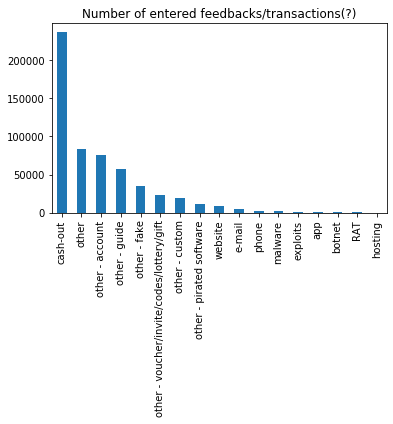

In [13]:
fig = df.category.value_counts().plot(kind = 'bar', title = 'Number of entered feedbacks/transactions(?)', figsize=(6,3.5), fontsize=10).get_figure()
fig.savefig('test.jpg')

There is no category which has a 5.0 as the average feedback value. The category with the highest value of the feedbacks is pirated software. Which would lead us to believe that people are most happy with this service.

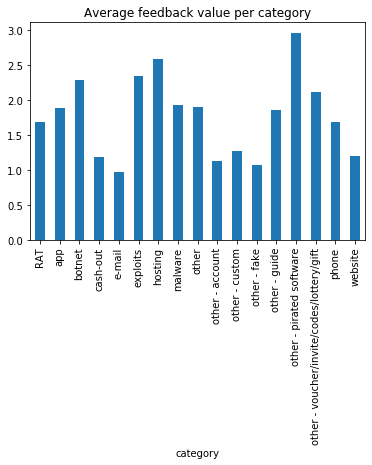

In [14]:
df.groupby(by = ['category']).mean().feedback_value.plot(kind = 'bar', title = 'Average feedback value per category')

Most amounts per order lie somewhere around the 50usd. Only one category has a clear outlier here which is the category custom. It makes sense that this is more expensive since a custom service would require more time and effort thus leading to a higher price.

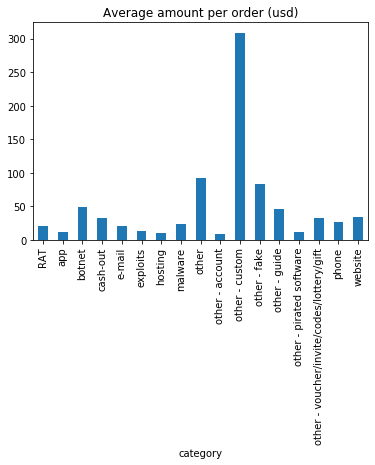

In [15]:
df.groupby(by = ['category']).mean().order_amount_usd.plot(kind = 'bar', title = 'Average amount per order (usd)')

# First look at the marketplaces

In [16]:
df.groupby(by = ['marketplace']).sum()

,feedback_value,order_amount_usd
marketplace,,
Agora,109659.0,1.818990e+06
Alphabay,0.0,1.303649e+07
Black Market Reloaded,0.0,6.851079e+05
Evolution,377446.0,6.125115e+06
Hydra,21976.0,2.422306e+05
Pandora,38096.0,3.943064e+05
Silk Road 1,259639.0,2.239430e+06
Silk Road 2,0.0,4.455336e+06


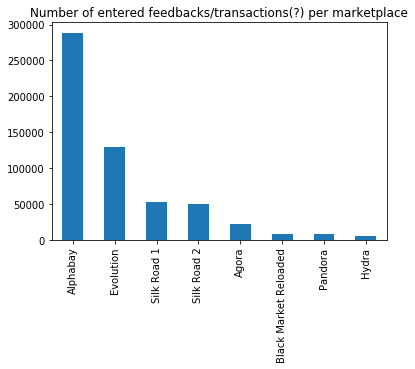

In [17]:
df.marketplace.value_counts().plot(kind = 'bar', title = 'Number of entered feedbacks/transactions(?) per marketplace')

Is het een bepaald product met een slechte review? Zijn het een missende waarden? Of wordt het heel slecht beoordeeld?

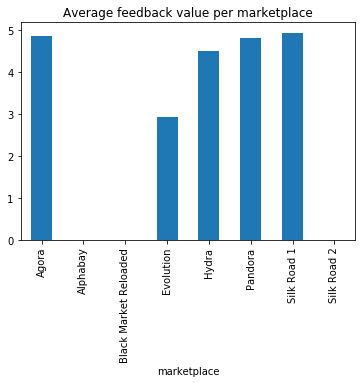

In [18]:
df.groupby(by = ['marketplace']).mean().feedback_value.plot(kind = 'bar', title = 'Average feedback value per marketplace')

Alphabay, Black Market Reloaded en Silk Road 2 have a feedback value of 0 for all their transactions.

In [19]:
df[df['marketplace'] == 'Alphabay'].feedback_value.unique()

array([0.])

In [20]:
df[df['marketplace'] == 'Black Market Reloaded'].feedback_value.unique()

array([0.])

In [21]:
df[df['marketplace'] == 'Silk Road 2'].feedback_value.unique()

array([0.])

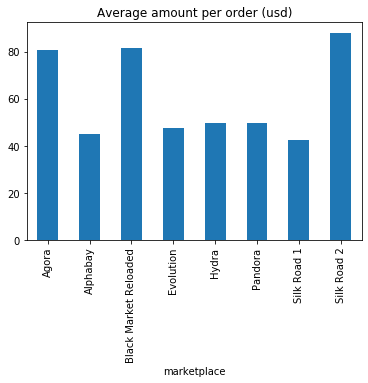

In [22]:
df.groupby(by = ['marketplace']).mean().order_amount_usd.plot(kind = 'bar', title = 'Average amount per order (usd)')

In [23]:
df.groupby(by = ['order_title']).mean()

,feedback_value,order_amount_usd
order_title,,
Tekla Structures 17.0 Multilingual,5.0,28.730
$100 U.S. Federal Reserve Note (Hundred Dollars),5.0,119.480
$100.00 Mailed to you Quickly and Discreetly,5.0,108.254
$40.00 Mailed to you Quickly and Discreetly,5.0,43.600
$80.00 Mailed to you Quickly and Discreetly,5.0,83.160
...,...,...
💎SCAM PAGES BLOCKCHAIN💎HQ★Phishing Pages★STORE★OFGREY★❷⓿❶❼TOP QUALITY★,0.0,10.560
💎SCAM PAGES PAYPAL💎 HQ★ 3 Models InCLuDeD ★STORE★OFGREY★❷⓿❶❼TOP QUALITY★,0.0,13.760
💎SCAM PAGES Phishing PAYPAL💎 HQ ★STORE★OFGREY★❷⓿❶❼,0.0,9.890


In [27]:
df.groupby(by = ['marketplace', 'category']).mean()

feedback_value  \
marketplace category                                                    
Agora       RAT                                              5.000000   
            app                                              4.714286   
            botnet                                           4.975904   
            cash-out                                         4.841533   
            e-mail                                           5.000000   
...                                                               ...   
Silk Road 2 other - guide                                    0.000000   
            other - pirated software                         0.000000   
            other - voucher/invite/codes/lottery/gift        0.000000   
            phone                                            0.000000   
            website                                          0.000000   

                                                       order_amount_usd  
marketplace category                                                     
Agora       RAT                                              160.613333  
            app                                                2.547429  
            botnet                                            27.099398  
            cash-out                                          75.492286  
            e-mail                                            30.537500  
...                                                                 ...  
Silk Road 2 other - guide                                    103.333007  
            other - pirated software                          19.396460  
            other - voucher/invite/codes/lottery/gift         62.116430  
            phone                                             33.259350  
            website                                          148.126447  

[129 rows x 2 columns]

In [31]:
df2 = df.groupby(by = ['marketplace', 'category']).mean().

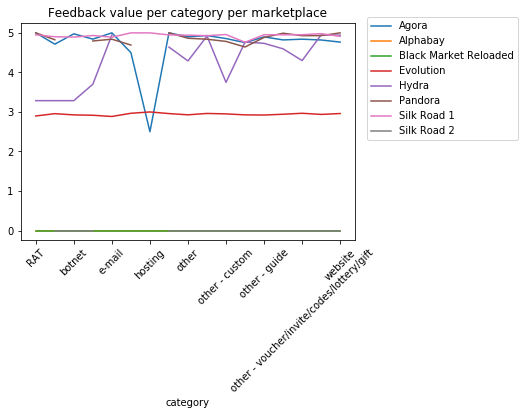

In [78]:
import matplotlib.pyplot as plt
df2 = df.groupby(by = ['category', 'marketplace']).mean().unstack().feedback_value
df2.plot(kind = 'line', title = "Feedback value per category per marketplace")
plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

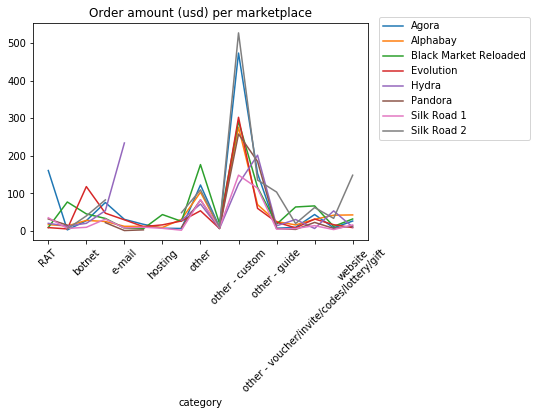

In [66]:
df2 = df.groupby(by = ['category', 'marketplace']).mean().unstack().order_amount_usd
df2.plot(kind = 'line', title = "Order amount (usd) per marketplace")
plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

In [67]:
df2

marketplace,Agora,Alphabay,Black Market Reloaded,Evolution,Hydra,Pandora,Silk Road 1,Silk Road 2
category,,,,,,,,
RAT,160.613333,16.553247,8.854000,8.601818,20.000000,31.690000,34.713516,NaN
app,2.547429,12.995674,76.841905,5.095391,12.500000,15.174783,6.511792,5.439733
botnet,27.099398,27.784401,45.134286,117.849137,20.000000,NaN,9.430773,39.693333
cash-out,75.492286,24.880647,32.970624,46.992280,53.743108,21.899724,31.235479,82.458830
e-mail,30.537500,12.072623,7.238980,29.345906,234.007634,0.782667,7.665685,NaN
exploits,17.410667,11.921581,5.793600,11.267261,NaN,2.605385,9.721983,102.967143
hosting,6.915000,9.011915,43.333333,15.925294,NaN,NaN,6.749804,NaN
malware,6.300588,30.633079,25.323556,26.202193,27.800000,9.509000,1.717200,48.315000
other,122.135552,102.800318,176.448576,53.422758,71.462011,82.420807,82.842803,109.188535


In [79]:
df2 = df2.rename(index = {'other - voucher/invite/codes/lottery/gift' : 'other - voucher'})

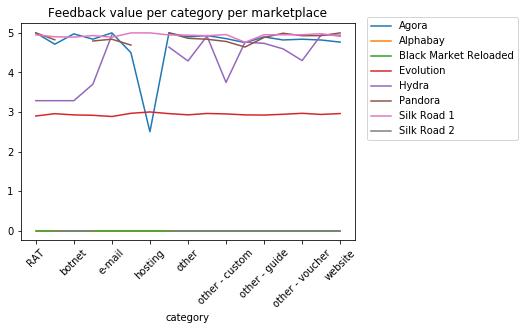

In [80]:
df2.plot(kind = 'line', title = "Feedback value per category per marketplace")
plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

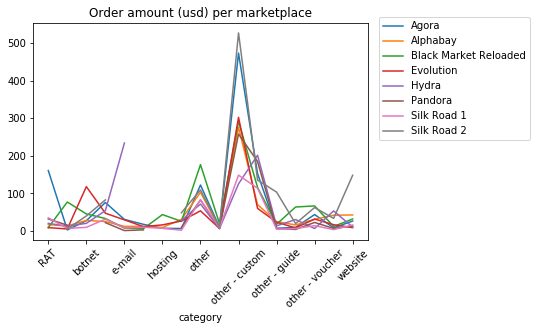

In [81]:
df3 = df.groupby(by = ['category', 'marketplace']).mean().unstack().order_amount_usd
df3 = df3.rename(index = {'other - voucher/invite/codes/lottery/gift' : 'other - voucher'})
df3.plot(kind = 'line', title = "Order amount (usd) per marketplace")
plt.xticks(rotation=45)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1.05))

The marketplace Pandora has no transactions in the category botnet and in hosting.

In [87]:
df[df['marketplace'] == 'Pandora'][df['category']=='botnet']

C:\Users\cvolt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd


In [88]:
df[df['marketplace'] == 'Pandora'][df['category']=='hosting']

C:\Users\cvolt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hash_str,category,marketplace,item_hash,date,giver_hash,receiver_hash,message,order_title,feedback_value,order_amount_usd


In [89]:
df[df['marketplace'] == 'Pandora'].category.unique()

array(['malware', 'app', 'website', 'exploits', 'e-mail', 'phone', 'RAT',
       'cash-out', 'other - account', 'other - custom', 'other - fake',
       'other - guide', 'other - pirated software',
       'other - voucher/invite/codes/lottery/gift', 'other'], dtype=object)

In [90]:
df[df['marketplace'] == 'Hydra'].category.unique()

array(['malware', 'app', 'website', 'botnet', 'e-mail', 'phone', 'RAT',
       'cash-out', 'other - account', 'other - custom', 'other - fake',
       'other - guide', 'other - pirated software',
       'other - voucher/invite/codes/lottery/gift', 'other'], dtype=object)

In [2]:
import pandas as pd
df = pd.read_csv(r'./items.csv')

In [3]:
df.head()

,item_hash,category,marketplace,title,vendor_hash,total_sales,first_observed,last_observed,ships_to,ships_from,description
0,00005f750be23a5f7addb026e1e2ff20,other - guide,Silk Road 2,3-5g-devils-cocktail,261da30fde08d717455eafdf265e00f3,584.09,2014-07-02,2014-10-29,Australia,Australia,30 day average: 4.87\n 60 day average: 4.91...
1,00019696ba886889ed7612e2938f97a0,cash-out,Alphabay,RANDOM USA TRACK2 101/201 With City-zip-state,2371addc4198d8ca4e938071c8670c79,30.00,2017-05-15,2017-05-15,Worldwide,Worldwide,RANDOM USA TRACK2 101/201 With city-zip-state\...
2,0005ea294a83143fe69089e90a8fe830,other,Evolution,Jason Ferruggia - The Renegade Diet (2011),a081033ab42c85ae4101549cd64ff4cb,0.96,2015-01-14,2015-01-29,NaN,Worldwide,NaN
3,000720c3991dc6b45cb76d7458455721,other - guide,Evolution,(eBook),35deec4895746c79f983d2ab81a2463a,1.63,2014-11-16,2015-01-13,NaN,Worldwide,NaN
4,0008018df8d0305b6888062b8423c3b4,other,Silk Road 2,rc-starter-kit-milligram-scale-and-tiny-spoons...,b3304a33c2fde583deb869a6c826ac8a,162.54,2014-02-05,2014-02-12,United States,United States,Highly accurate milligram (0.001g resolution) ...


In [5]:
marketplace = df.groupby(by=['marketplace'])

In [10]:
marketplace.sum().reset_index().to_csv('marketplace.csv', encoding='utf-16')

pandas.core.groupby.generic.DataFrameGroupBy

AttributeError: 'DataFrameGroupBy' object has no attribute '__attr__'